In [16]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
import pandas as pd

## Figure 6: approximation ratio of all possible cuts in Max-Cut

[]

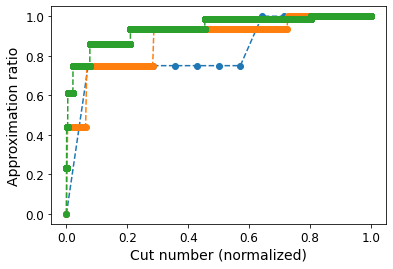

In [4]:
fig, ax = plt.subplots()
N=2
for n in range(1,4):
    N *= 2
    x_axis =np.linspace(0, 1., num=(2**(N)-1))
    y_list=[]
    for k in range(1, N+1):
        n_choices = math.factorial(N)/(math.factorial(k)*math.factorial(N-k))
        for m in range(int(n_choices)):
            y_list.append(k*(N-k)/(N**2/4.))
    y_list= np.sort(y_list)
    ax.plot(x_axis,y_list,'o--')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Cut number (normalized)", fontsize=14)
ax.set_ylabel("Approximation ratio", fontsize=14)
plt.plot()

# Figure 7: Max-4-Cut approximation ratio evolution

In [5]:
from Puffin import arctica
import Puffin

ModuleNotFoundError: No module named 'igraph'

`puffin.py` is the file from which are simulated the results for Fig.7. To generate data, simply call the function `puffin.py`. 

Note: The code has been written to run on GENCI HPC Occigen, a super-computer. Running it locally on your PC will take several hours. You can however run a test for one graph by changing the parameters inside of `puffin.py`.

In [6]:
arctica.main('MIS')

NameError: name 'arctica' is not defined

In [7]:
arctica.main("MKC_P")

NameError: name 'arctica' is not defined

The generated data is stored in the repository `MKC_simulations`. We can now plot the figure:

In [8]:
import pathlib
import json

In [9]:
def main():
    j = 0
    data = []
    cost_fig1 = []
    for i in range(100):
        filepath = 'Puffin/puffin_data/MKC_simulations/final_Unif_' + ''.join(str(i)) + '.txt'
        file = pathlib.Path(filepath)
        if file.exists ():
            with open(filepath) as fp:
                for line in fp:
                    data.append(json.loads(line))
        filepath = 'Puffin/puffin_data/MKC_simulations/final_Poisson_' + ''.join(str(i)) + '.txt'
        file = pathlib.Path(filepath)
        if file.exists ():
            with open(filepath) as fp:
                for line in fp:
                    data.append(json.loads(line))
    return data

def plot_maxcut():
    costy_main = []
    cost_main = main()
    for i in range(len(cost_main)):
        costy_main.append(cost_main[i][0])


    cost = np.array(costy_main)
    data = []
    for i in range(7):
        data.append(cost[:,i])

    pos = [i+1 for i in range(7)]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
    ax.plot([i for i in range(9)],[0.850304 for i in range(9)],'--',color='grey')
    ax.violinplot(data, pos, points=100, widths=0.5,
                          showmeans=False, showextrema=True, showmedians=True,
                          bw_method='silverman')
    plt.text(6.2, 0.84, 'classical worst-case', color='grey', fontsize=14 )
    ax.set_xlabel('Depth', fontsize=14)
    ax.set_ylabel('Approximation ratio', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.show()


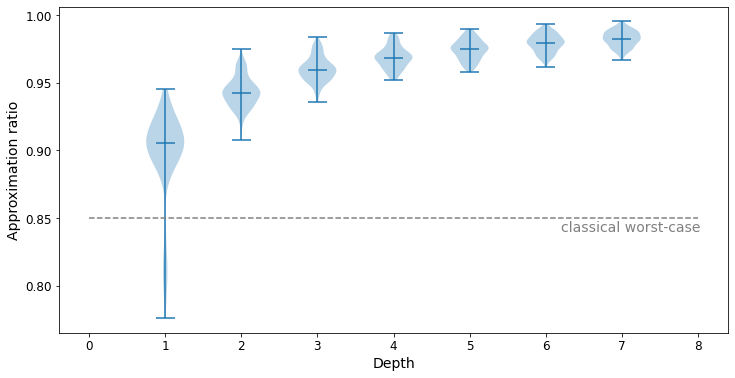

In [10]:
plot_maxcut()

# Figure 8:  MIS

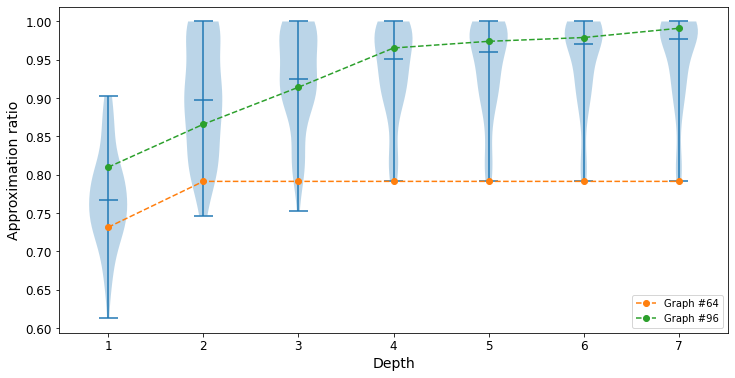

In [28]:
def get_data():
    j = 0
    data = [[0 for i in range(7)] for i in range(200)]
    cost_fig1 = []
    for i in range(200):
        filepath = "Puffin/puffin_data/MIS_simulations/MIS_final_" + ''. join(str(i)) +".txt"
        file = pathlib.Path(filepath)
        if file.exists ():
            with open(filepath) as fp:
                for line in fp:
                    data[i] = json.loads(line)
    
    return data

cost = get_data()
true_cost = []
for c in cost:
    if c != [0, 0, 0, 0, 0, 0, 0]:
        true_cost.append(c)
costa = np.array(true_cost)
pos = [i+1 for i in range(7)]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.violinplot(costa, pos, points=40, widths=0.4,
                      showmeans=False, showextrema=True, showmedians=True,
                      bw_method='silverman')
ax.set_xlabel('Depth', fontsize=14)
ax.set_ylabel('Approximation ratio', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
for f in [64,96]:
    plt.plot([i+1 for i in range(7)],cost[f],'o--' ,label='Graph #%i' %f)
plt.legend(loc="lower right")
plt.show()

# Figure 5

- plotting methods

In [20]:
def p_max(size):
    if size < 10:
        return 7
    if size < 12:
        return 6
    if size <= 16:
        return 4
    else:
        return 1

styles=[(0, (1, 1)), (0, (5, 5)), (0, (5, 1)), "-.", (0, (3, 5, 1, 5))]

def scaling_app(app_ratios):
    
    fig, ax = plt.subplots(figsize=(10, 5))
    i=0
    
    for size, apps in app_ratios.items():
        pmax = p_max(size)
        std = np.std(apps, axis=0)
        mean = np.mean(apps, axis=0)
        ax.errorbar(range(1, pmax + 1), mean, yerr = std, xerr = None, label = "|V|=" + str(size), linestyle=styles[i]) 
        i+=1
        
    handles, labels = ax.get_legend_handles_labels()
    handles = [h[0] for h in handles]
    ax.legend(handles, labels, loc='lower right', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel(r"Depth", fontsize=14)
    ax.set_ylabel(r"Approximation ratio", fontsize=14)
    
def plot_relative_performance(results, f = lambda x: np.divide(1, x)):
    
    fig, ax = plt.subplots(figsize=(10, 5))

    methods = ["Random", "QAOA_1"]
    means = pd.DataFrame(columns= methods)
    stds = pd.DataFrame(columns= methods)
    
    for size, df in results.items():
        
        app_ratios = df.loc[:, methods].divide(df["DP"], axis=0)
        
        means = means.append(f(app_ratios).mean(axis=0), ignore_index=True)
        stds = stds.append(f(app_ratios).std(axis=0), ignore_index=True)
        
    i=0
    for method in means.columns:
        ax.errorbar(results.keys(), means[method], yerr = stds[method], xerr = None, label = method, linestyle=styles[i])
        i+=1

    handles, labels = ax.get_legend_handles_labels()
    handles = [h[0] for h in handles]
    
    ax.legend(handles, labels, loc='lower right', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel(r"Number of jobs $|V|$", fontsize=14)
    ax.set_ylabel(r"Approximation ratio", fontsize=14)

- Plot figures using precalculated results

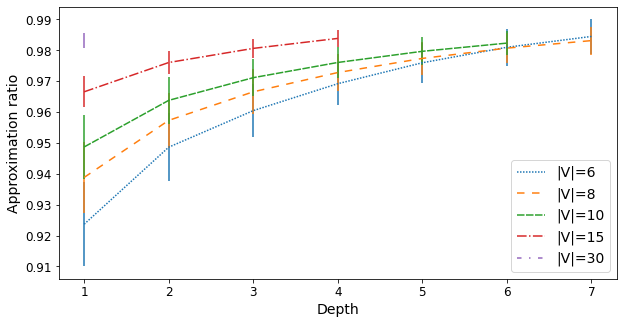

In [21]:
app_ratios_p = {}

for size in [6, 8, 10, 15, 30]:   
    app_ratios_p[size] = np.genfromtxt('Puffin/puffin_data/MC_simulations/ResultsQLM_6-30/graphs_' + str(size) + '/Nelder-Mead_app_ratios_pmax-' + str(p_max(size)) + '_n-100.csv',delimiter=',')
    
scaling_app(app_ratios_p)

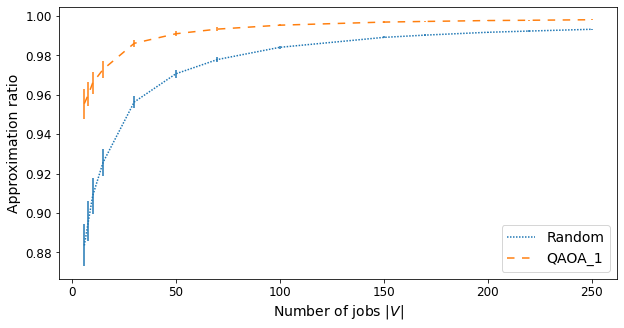

In [22]:
results = {}
for size in [6, 8, 10, 15, 30, 50, 70, 100, 150, 170, 200, 220, 250]:
    results[size] = pd.read_csv('Puffin/puffin_data/MC_simulations/Results_6-250/sols_'+str(size), header=0)
    
plot_relative_performance(results, f = lambda x: (np.divide(1, x)))

# Figure 10

- Plotting methods

In [23]:
def plot_param_evolution(betas, gammas, p_max, title = None):
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    
    axes[0].tick_params(axis='both', which='major', labelsize=12)
    axes[0].set_xlabel("Depth i", fontsize=14)
    axes[0].set_ylabel(r"Optimal $\beta_i$", fontsize=14)
    
    axes[1].tick_params(axis='both', which='major', labelsize=12)
    axes[1].set_xlabel("Depth i", fontsize=14)
    axes[1].set_ylabel(r"Optimal $\gamma_i$", fontsize=14)
    
    axes[0].plot(1, betas[0], marker='o', markersize=10, label = "p = 1")
    axes[1].plot(1, gammas[0], marker='o', markersize=10, label = "p = 1")
    
    for p in range(2, p_max+1):
        start = int(p * (p-1) / 2)
        axes[0].plot(range(1, p+1), betas[start:start + p], label = "p = " + str(p), marker='o', linestyle='dashed', markersize=10)
        axes[1].plot(range(1, p+1), gammas[start:start + p], label = "p = " + str(p), marker='o', linestyle='dashed', markersize=10)
    axes[0].legend(fontsize=14)
    axes[1].legend(fontsize=14)
    if title is not None:
        fig.suptitle(title)
    
def plot_qaoa_params(betas, gammas, f = lambda x: 1):
    fig, ax = plt.subplots(figsize=(9,7))
    
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel(r"Optimal $\beta$", fontsize=14)
    ax.set_ylabel(r"Optimal $\gamma$", fontsize=14)    
    
    for size in betas.keys():
        ax.scatter(betas[size], gammas[size] * f(size), label =r'$|V| = $' + str(size))
        
    ax.set_xlim(0.05, 0.35)
    ax.legend(fontsize=12)
    

- Plot figures using precalculated results

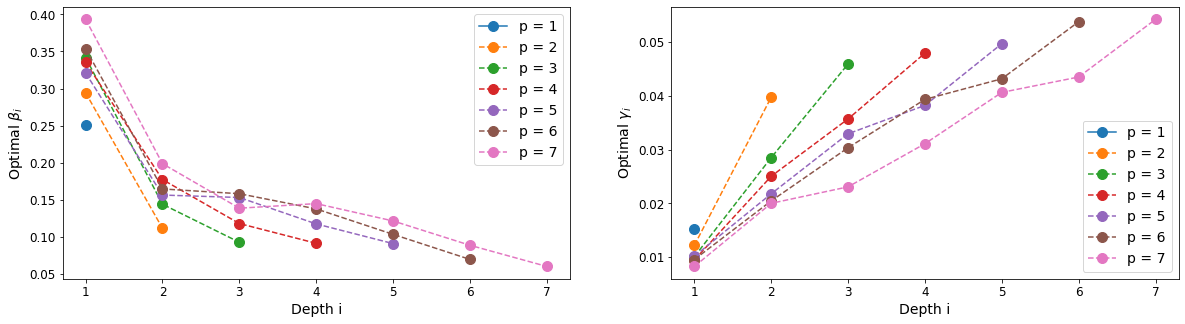

In [24]:
ex_betas_p = np.genfromtxt('Puffin/puffin_data/MC_simulations/ResultsQLM_6-30/graphs_8/Nelder-Mead_betas_pmax-7_n-100.csv',delimiter=',')
ex_gammas_p = np.genfromtxt('Puffin/puffin_data/MC_simulations/ResultsQLM_6-30/graphs_8/Nelder-Mead_gammas_pmax-7_n-100.csv',delimiter=',')

plot_param_evolution(ex_betas_p[0], ex_gammas_p[0], p_max=7)

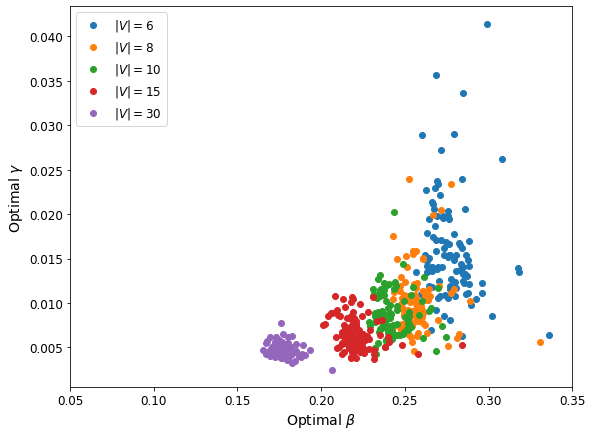

In [27]:
betas = {}
gammas = {}

for size in [6, 8, 10, 15, 30]:
    results = pd.read_csv('Puffin/puffin_data/MC_simulations/Results_6-250/sols_'+str(size), header=0)
    betas[size] = results['QAOA_beta'].to_numpy()
    gammas[size] = results['QAOA_gamma'].to_numpy()
    
plot_qaoa_params(betas, gammas)